# Example Tutorial 1 -  Constituency Analysis

Welcome to our first tutorial! 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/weirdos-and-misfits%2Fblog/master)


Today we will use `python` modules [pandas](https://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) to open election and government deprivation data and quickly analyse and make some plots of this.

Contents:
1. [Introduction](#introduction) 
  1. [Loading a file into a dataframe](#opening-a-file)
  2. [Viewing a dataframe](#viewing-a-dataframe)
  3. [Viewing a dataframe element](#viewing-a-dataframe-element)
2. [Merging Dataframes](#merging-dataframes)
  1. [Filtering a dataframe](#filtering-a-dataframe)
  2. [Joining dataframes](#joining-dataframes)
3. [Constituency Analysis](#constituency-analysis)
  1. [Create a new column](#create-a-new-colum)
  2. [Creating a decile](#creating-a-decile)
  3. [Simple scatter plot](#simple-scatter-plot)
  4. [Multiple scatter plots](#multiple-scatter-plots)
  5. [Scatter with 3D](#scatter-with-3d)
  6. [Histograms](#histograms)

## Introduction <a name="introduction"></a>

As a quick introduction we'll open up a spreadsheet of 2019 election results and put it in a pandas dataframe.


The election data is easily obtainable in numerous places online, a quick copy of what we're looking at can be found here: https://docs.google.com/spreadsheets/d/1oL6PTxbVSAwTepXtmgsdPnNuP0pM56OQAfvum9jzAcM/edit?usp=sharing


Firstly we need to import pandas module so we can use all its functionality:

In [41]:
import pandas as pd

_Note: the `as pd` part is not needed, all this does is gives pandas a shorter name in the code_ 

### Loading a file into a dataframe <a name="opening-a-file"></a>

Pandas has many functions that enable different data formats (such as: `json`, `xml`, `csv` , `sql`, etc.) to be loaded into a "pandas data frame". We can use the `read_excel` function to open the spreadsheet "voting-summary":

In [42]:
df_election=pd.read_excel("data/general-election-results-2019.xlsx",sheet_name='voting-summary')

### Viewing a dataframe <a name="viewing-a-dataframe"></a>

In jupyter we can display this table (truncated) to see what we have loaded, doing this is python won't show anything:

In [43]:
df_election

ons_id ons_region_id          constituency_name         county_name  \
0    W07000049     W92000004                   Aberavon      West Glamorgan   
1    W07000058     W92000004                  Aberconwy               Clwyd   
2    S14000001     S92000003             Aberdeen North            Scotland   
3    S14000002     S92000003             Aberdeen South            Scotland   
4    S14000003     S92000003         Airdrie and Shotts            Scotland   
..         ...           ...                        ...                 ...   
645  E14001059     E12000002  Wythenshawe and Sale East  Greater Manchester   
646  E14001060     E12000009                     Yeovil            Somerset   
647  W07000041     W92000004                   Ynys Mon             Gwynedd   
648  E14001061     E12000003               York Central     North Yorkshire   
649  E14001062     E12000003                 York Outer     North Yorkshire   

                  region_name country_name constituency_type  \
0                       Wales        Wales            County   
1                       Wales        Wales            County   
2                    Scotland     Scotland           Borough   
3                    Scotland     Scotland           Borough   
4                    Scotland     Scotland            County   
..                        ...          ...               ...   
645                North West      England           Borough   
646                South West      England            County   
647                     Wales        Wales            County   
648  Yorkshire and The Humber      England           Borough   
649  Yorkshire and The Humber      England            County   

       declaration_time mp_firstname mp_surname  ... alliance other  \
0   2019-12-13 02:30:00      Stephen    Kinnock  ...        0   731   
1   2019-12-13 03:09:00        Robin     Millar  ...        0     0   
2   2019-12-13 03:13:00       Kirsty   Blackman  ...        0     0   
3   2019-12-13 03:34:00      Stephen      Flynn  ...        0     0   
4   2019-12-13 02:59:00         Neil       Gray  ...        0     0   
..                  ...          ...        ...  ...      ...   ...   
645 2019-12-13 05:04:00      Michael       Kane  ...        0    58   
646 2019-12-13 05:28:00       Marcus       Fysh  ...        0   875   
647 2019-12-13 02:45:00     Virginia    Crosbie  ...        0     0   
648 2019-12-13 04:18:00      Rachael    Maskell  ...        0   691   
649 2019-12-13 04:35:00       Julian     Sturdy  ...        0   692   

    other_winner       mp_fullname  majority_percent  majority_rank  \
0              0   Stephen Kinnock          0.331983            209   
1              0      Robin Millar          0.063832            569   
2              0   Kirsty Blackman          0.338652            202   
3              0     Stephen Flynn          0.087427            533   
4              0         Neil Gray          0.130770            459   
..           ...               ...               ...            ...   
645            0      Michael Kane          0.232266            331   
646            0       Marcus Fysh          0.273051            279   
647            0  Virginia Crosbie          0.053841            581   
648            0   Rachael Maskell          0.273609            278   
649            0     Julian Sturdy          0.180407            390   

     turnout_const  turnout_reg  turnout_uk  turnout_2017  
0         0.622621     0.665721    0.673108      0.666800  
1         0.712879     0.665721    0.673108      0.710482  
2         0.598713     0.680736    0.673108      0.591614  
3         0.694441     0.680736    0.673108      0.684887  
4         0.621331     0.680736    0.673108      0.592430  
..             ...          ...         ...           ...  
645       0.586519     0.656236    0.673108      0.600385  
646       0.718582     0.720191    0.673108      0.716436  
647       0.703938     0.665721    0.673108 

To see the top 5 rows of the data-frame, we can use the function `head`:

In [44]:
df_election.head(5)

ons_id ons_region_id   constituency_name     county_name region_name  \
0  W07000049     W92000004            Aberavon  West Glamorgan       Wales   
1  W07000058     W92000004           Aberconwy           Clwyd       Wales   
2  S14000001     S92000003      Aberdeen North        Scotland    Scotland   
3  S14000002     S92000003      Aberdeen South        Scotland    Scotland   
4  S14000003     S92000003  Airdrie and Shotts        Scotland    Scotland   

  country_name constituency_type    declaration_time mp_firstname mp_surname  \
0        Wales            County 2019-12-13 02:30:00      Stephen    Kinnock   
1        Wales            County 2019-12-13 03:09:00        Robin     Millar   
2     Scotland           Borough 2019-12-13 03:13:00       Kirsty   Blackman   
3     Scotland           Borough 2019-12-13 03:34:00      Stephen      Flynn   
4     Scotland            County 2019-12-13 02:59:00         Neil       Gray   

   ... alliance other other_winner      mp_fullname  majority_percent  \
0  ...        0   731            0  Stephen Kinnock          0.331983   
1  ...        0     0            0     Robin Millar          0.063832   
2  ...        0     0            0  Kirsty Blackman          0.338652   
3  ...        0     0            0    Stephen Flynn          0.087427   
4  ...        0     0            0        Neil Gray          0.130770   

   majority_rank  turnout_const  turnout_reg  turnout_uk  turnout_2017  
0            209       0.622621     0.665721    0.673108      0.666800  
1            569       0.712879     0.665721    0.673108      0.710482  
2            202       0.598713     0.680736    0.673108      0.591614  
3            533       0.694441     0.680736    0.673108      0.684887  
4            459       0.621331     0.680736    0.673108      0.592430  

[5 rows x 39 columns]

There are many othe functions, such as `.tail(n)` (to display the last `n` rows) or `.sample(n)` (to display a random `n` rows)

To print all 'headers' or 'column names' of the data-frame, we can do:

In [45]:
df_election.columns

Index(['ons_id', 'ons_region_id', 'constituency_name', 'county_name',
       'region_name', 'country_name', 'constituency_type', 'declaration_time',
       'mp_firstname', 'mp_surname', 'mp_gender', 'result', 'first_party',
       'second_party', 'electorate', 'valid_votes', 'invalid_votes',
       'majority', 'con', 'lab', 'ld', 'brexit', 'green', 'snp', 'pc', 'dup',
       'sf', 'sdlp', 'uup', 'alliance', 'other', 'other_winner', 'mp_fullname',
       'majority_percent', 'majority_rank', 'turnout_const', 'turnout_reg',
       'turnout_uk', 'turnout_2017'],
      dtype='object')

Set the index of the dataframe to be the ONS `id` for the constituency

See: https://en.wikipedia.org/wiki/ONS_coding_system for more information


In [46]:
df_election.set_index('ons_id',inplace=True)
df_election.sample(6)

ons_region_id        constituency_name         county_name  \
ons_id                                                                 
E14000988     E12000009            Taunton Deane            Somerset   
E14000689     E12000003       Elmet and Rothwell      West Yorkshire   
E14000680     E12000008           East Hampshire           Hampshire   
E14000537     E12000002        Ashton-Under-Lyne  Greater Manchester   
W07000047     W92000004             Swansea West      West Glamorgan   
E14000544     E12000006  Basildon and Billericay               Essex   

                        region_name country_name constituency_type  \
ons_id                                                               
E14000988                South West      England            County   
E14000689  Yorkshire and The Humber      England            County   
E14000680                South East      England            County   
E14000537                North West      England           Borough   
W07000047                     Wales        Wales           Borough   
E14000544                      East      England           Borough   

             declaration_time mp_firstname  mp_surname mp_gender  ...  \
ons_id                                                            ...   
E14000988 2019-12-13 04:38:00      Rebecca         Pow    Female  ...   
E14000689 2019-12-13 04:15:00         Alec  Shelbrooke      Male  ...   
E14000680 2019-12-13 03:16:00       Damian       Hinds      Male  ...   
E14000537 2019-12-13 04:05:00       Angela      Rayner    Female  ...   
W07000047 2019-12-13 02:02:00      Geraint      Davies      Male  ...   
E14000544 2019-12-13 01:48:00         John       Baron      Male  ...   

          alliance other other_winner      mp_fullname  majority_percent  \
ons_id                                                                     
E14000988        0  2390            0      Rebecca Pow          0.183578   
E14000689        0  1196            0  Alec Shelbrooke          0.298033   
E14000680        0   812            0     Damian Hinds          0.346182   
E14000537        0     0            0    Angela Rayner          0.110501   
W07000047        0     0            0   Geraint Davies          0.226514   
E14000544        0   224            0       John Baron          0.462563   

           majority_rank  turnout_const  turnout_reg  turnout_uk  turnout_2017  
ons_id                                                                          
E14000988            385       0.718718     0.720191    0.673108      0.737833  
E14000689            249       0.719209     0.643472    0.673108      0.741578  
E14000680            193       0.743939     0.702066    0.673108      0.747232  
E14000537            490       0.567522     0.656236    0.673108      0.604903  
W07000047            336       0.627737     0.665721    0.673108      0.655312  
E14000544             60       0.631248     0.682460    0.673108      0.649583  

[6 rows x 38 columns]

Randomly sample 5 constituencies and only show the outcome of the result, the number of labour votes, the number of conservative votes and the voter turnout (1=100%):

In [47]:
df_election[['constituency_name','result','lab','con','turnout_const']].sample(5)

constituency_name            result    lab    con  \
ons_id                                                               
E14000684               Eastbourne  Con gain from LD   3848  26951   
E14000604  Bromley and Chislehurst          Con hold  13067  23958   
E14000813         Mid Bedfordshire          Con hold  14028  38692   
W07000056             Newport West          Lab hold  18977  18075   
E14001001                   Totnes          Con hold   8860  27751   

           turnout_const  
ons_id                    
E14000684       0.695197  
E14000604       0.683179  
E14000813       0.737138  
W07000056       0.651589  
E14001001       0.746919

_Note: `['constituency_name','result','lab','con','turnout_const']` is known as a `list` of `strings` in python, it's a way of pulling out the data based on this list_

### Viewing a dataframe element <a name="viewing-a-dataframe-element"></a>

Look up a result based on the ONS ID for the constituency, since we had previously set the index to be `ons_id`:

In [49]:
df_election.loc['E14000944']

ons_region_id                  E12000001
constituency_name          South Shields
county_name                Tyne and Wear
region_name                   North East
country_name                     England
constituency_type                Borough
declaration_time     2019-12-13 01:00:00
mp_firstname                        Emma
mp_surname                   Lewell-Buck
mp_gender                         Female
result                          Lab hold
first_party                          Lab
second_party                         Con
electorate                         62793
valid_votes                        37882
invalid_votes                         80
majority                            9585
con                                 7688
lab                                17273
ld                                  1514
brexit                              6446
green                               1303
snp                                    0
pc                                     0
dup             

We can dind a result by the name of the constituency, by looking to see if the constituency name constains a certain string, in this example `Bolsover`:

In [51]:
df_election[df_election['constituency_name'].str.contains('Bolsover')].squeeze()

ons_region_id                  E12000004
constituency_name               Bolsover
county_name                   Derbyshire
region_name                East Midlands
country_name                     England
constituency_type                 County
declaration_time     2019-12-13 05:05:00
mp_firstname                        Mark
mp_surname                      Fletcher
mp_gender                           Male
result                 Con gain from Lab
first_party                          Con
second_party                         Lab
electorate                         74292
valid_votes                        45938
invalid_votes                        151
majority                            5299
con                                21791
lab                                16492
ld                                  1759
brexit                              4151
green                                758
snp                                    0
pc                                     0
dup             

_Note: the function `.squeeze()` just puts this into a format to view the data as a series, you can try removing this function and you'll see that the output comes in the form of a dataframe instead_

The above method was the best way to find a constituency if we weren't 100% sure of the name, if we know the exact name we can find it by simply using `==` instead of `str.contains()`:

In [54]:
df_election[df_election['constituency_name'] == 'Bolsover'].squeeze()

ons_region_id                  E12000004
constituency_name               Bolsover
county_name                   Derbyshire
region_name                East Midlands
country_name                     England
constituency_type                 County
declaration_time     2019-12-13 05:05:00
mp_firstname                        Mark
mp_surname                      Fletcher
mp_gender                           Male
result                 Con gain from Lab
first_party                          Con
second_party                         Lab
electorate                         74292
valid_votes                        45938
invalid_votes                        151
majority                            5299
con                                21791
lab                                16492
ld                                  1759
brexit                              4151
green                                758
snp                                    0
pc                                     0
dup             

As another example of using `str.contains` we can use it to find all constituencies that match a pattern:

In [56]:
df_election[df_election['constituency_name'].str.contains('Ash')]

ons_region_id  constituency_name         county_name    region_name  \
ons_id                                                                          
E14000535     E12000004           Ashfield     Nottinghamshire  East Midlands   
E14000536     E12000008            Ashford                Kent     South East   
E14000537     E12000002  Ashton-Under-Lyne  Greater Manchester     North West   

          country_name constituency_type    declaration_time mp_firstname  \
ons_id                                                                      
E14000535      England            County 2019-12-13 04:13:00          Lee   
E14000536      England            County 2019-12-13 03:03:00       Damian   
E14000537      England           Borough 2019-12-13 04:05:00       Angela   

          mp_surname mp_gender  ... alliance  other other_winner  \
ons_id                          ...                                
E14000535   Anderson      Male  ...        0  13498            0   
E14000536      Green      Male  ...        0    862            0   
E14000537     Rayner    Female  ...        0      0            0   

             mp_fullname  majority_percent  majority_rank  turnout_const  \
ons_id                                                                     
E14000535   Lee Anderson          0.117048            478       0.626311   
E14000536   Damian Green          0.400090            126       0.670653   
E14000537  Angela Rayner          0.110501            490       0.567522   

           turnout_reg  turnout_uk  turnout_2017  
ons_id                                            
E14000535     0.671702    0.673108      0.640312  
E14000536     0.702066    0.673108      0.685216  
E14000537     0.656236    0.673108      0.604903  

[3 rows x 38 columns]

## Merging Dataframes <a name="merging-dataframes"></a>

Dataframes can very easily be merged/joined in order to connect together information, in our case: information on constituencies.

A second input `csv` was preprepared by by merging the [English Indices Of Deprivation Data](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019) with lookup tables for the PCON19CD (2019 parliamentary consistuency), MSOA11CD (middle-layer-super-output-area) and LSOA (lower-layer-super-output-area). Election data and demographics data from `gov.uk` have also been loaded. 

All original data came in the form of `csv` files and have just been saved as merged `.csv` files for convience - it could have quite easily been saved as a `pickle` or `jsons` or your favourite format.. pandas really can handle so many different types of input data!



In [138]:
df_imd = pd.read_csv("data/simple_dataframe_example_1.csv")
df_imd

PCON19CD                   PCON19NM  \
0    E14000530                  Aldershot   
1    E14000531        Aldridge-Brownhills   
2    E14000532   Altrincham and Sale West   
3    E14000533               Amber Valley   
4    E14000534    Arundel and South Downs   
..         ...                        ...   
529  E14001058                Wyre Forest   
530  E14001059  Wythenshawe and Sale East   
531  E14001060                     Yeovil   
532  E14001061               York Central   
533  E14001062                 York Outer   

     Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                    14.549551             0.096318   
1                                    18.721940             0.117098   
2                                    10.386922             0.071845   
3                                    20.896410             0.126462   
4                                    11.332723             0.059644   
..                                         ...                  ...   
529                                  22.436670             0.127507   
530                                  34.853754             0.199753   
531                                  18.249344             0.102282   
532                                  14.027374             0.083224   
533                                   7.620637             0.050824   

     Employment Score (rate)  Education, Skills and Training Score  \
0                   0.062204                             18.126475   
1                   0.094681                             22.413754   
2                   0.062086                              5.619948   
3                   0.108882                             31.667443   
4                   0.052690                             11.784967   
..                       ...                                   ...   
529                 0.105972                             25.827284   
530                 0.153099                             28.169546   
531                 0.085161                             21.955349   
532                 0.063173                             19.592255   
533                 0.046880                             10.014633   

     Health Deprivation and Disability Score  Crime Score  \
0                                  -0.295728    -0.034678   
1                                   0.231410    -0.359141   
2                                  -0.438590    -0.154364   
3                                   0.269610    -0.584271   
4                                  -0.817716    -0.696278   
..                                       ...          ...   
529                                -0.057544     0.083331   
530                                 1.019146     0.621287   
531                                -0.136529    -0.188726   
532                                -0.179262    -0.553231   
533                                -0.570438    -1.299277   

     Barriers to Housing and Services Score  Living Environment Score  ...  \
0                                 21.720754                 12.484450  ...   
1                                 17.155914                 18.366631  ...   
2                                 13.211071                 16.702728  ...   
3                                 15.531045                 15.093821  ...   
4                                 26.635333                 21.858066  ...   
..                                      ...                       ...  ...   
529                               23.970980                 23.293859  ...   
530                               20.782263                 21.912595  ...   
531                               22.462666                 22.948641  ...   
532                               15.901624                 21.837009  ...   
533                               16.931407                 11.575000  ...   

     Dependent Children aged 0-15: mid 2015 (excluding prisoners)  \
0                               

As before, we can see what columns are available to us:

In [139]:
df_imd.columns

Index(['PCON19CD', 'PCON19NM', 'Index of Multiple Deprivation (IMD) Score',
       'Income Score (rate)', 'Employment Score (rate)',
       'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score', 'Living Environment Score',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)',
       'Children and Young People Sub-domain Score',
       'Adult Skills Sub-domain Score',
       'Geographical Barriers Sub-domain Score',
       'Wider Barriers Sub-domain Score', 'Indoors Sub-domain Score',
       'Outdoors Sub-domain Score',
       'Total population: mid 2015 (excluding prisoners)',
       'Dependent Children aged 0-15: mid 2015 (excluding prisoners)',
       'Population aged 16-59: mid 2015 (excluding prisoners)',
       'Older population aged 60 and over: mid 2015 (excluding prisoners)',
       'Wor

Before we go further, we will again set the index of this dataframe to be `PCON19CD` which is the same "reference" ONS number as the previous dataframe:

In [140]:
df_imd.set_index('PCON19CD',inplace=True)
df_imd

PCON19NM  \
PCON19CD                               
E14000530                  Aldershot   
E14000531        Aldridge-Brownhills   
E14000532   Altrincham and Sale West   
E14000533               Amber Valley   
E14000534    Arundel and South Downs   
...                              ...   
E14001058                Wyre Forest   
E14001059  Wythenshawe and Sale East   
E14001060                     Yeovil   
E14001061               York Central   
E14001062                 York Outer   

           Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
PCON19CD                                                                    
E14000530                                  14.549551             0.096318   
E14000531                                  18.721940             0.117098   
E14000532                                  10.386922             0.071845   
E14000533                                  20.896410             0.126462   
E14000534                                  11.332723             0.059644   
...                                              ...                  ...   
E14001058                                  22.436670             0.127507   
E14001059                                  34.853754             0.199753   
E14001060                                  18.249344             0.102282   
E14001061                                  14.027374             0.083224   
E14001062                                   7.620637             0.050824   

           Employment Score (rate)  Education, Skills and Training Score  \
PCON19CD                                                                   
E14000530                 0.062204                             18.126475   
E14000531                 0.094681                             22.413754   
E14000532                 0.062086                              5.619948   
E14000533                 0.108882                             31.667443   
E14000534                 0.052690                             11.784967   
...                            ...                                   ...   
E14001058                 0.105972                             25.827284   
E14001059                 0.153099                             28.169546   
E14001060                 0.085161                             21.955349   
E14001061                 0.063173                             19.592255   
E14001062                 0.046880                             10.014633   

           Health Deprivation and Disability Score  Crime Score  \
PCON19CD                                                          
E14000530                                -0.295728    -0.034678   
E14000531                                 0.231410    -0.359141   
E14000532                                -0.438590    -0.154364   
E14000533                                 0.269610    -0.584271   
E14000534                                -0.817716    -0.696278   
...                                            ...          ...   
E14001058                                -0.057544     0.083331   
E14001059                                 1.019146     0.621287   
E14001060                                -0.136529    -0.188726   
E14001061                                -0.179262    -0.553231   
E14001062                                -0.570438    -1.299277   

           Barriers to Housing and Services Score  Living Environment Score  \
PCON19CD                                                                      
E14000530                               21.720754                 12.484450   
E14000531                               17.155914                 18.366631   
E14000532                               13.211071                 16.702728   
E14000533                               15.531045                 15.093821   
E14000534                               26.635333                 21.858066   
...                                           ...                       ...   
E14001058   

In [141]:
df_imd.sort_values('Index of Multiple Deprivation (IMD) Score')

PCON19NM  Index of Multiple Deprivation (IMD) Score  \
PCON19CD                                                                       
E14000844    North East Hampshire                                   6.133602   
E14001048               Wokingham                                   6.432234   
E14000631    Chesham and Amersham                                   6.952311   
E14000908              Rushcliffe                                   7.160663   
E14000953       South West Surrey                                   7.521763   
...                           ...                                        ...   
E14000564    Birmingham, Ladywood                                  45.327519   
E14000819           Middlesbrough                                  45.756061   
E14000573         Blackpool South                                  48.355159   
E14000563  Birmingham, Hodge Hill                                  49.911205   
E14000794       Liverpool, Walton                                  55.675528   

           Income Score (rate)  Employment Score (rate)  \
PCON19CD                                                  
E14000844             0.041477                 0.035900   
E14001048             0.045369                 0.037306   
E14000631             0.052448                 0.045143   
E14000908             0.058052                 0.053363   
E14000953             0.055769                 0.048732   
...                        ...                      ...   
E14000564             0.272746                 0.176050   
E14000819             0.286085                 0.208434   
E14000573             0.261501                 0.211649   
E14000563             0.301617                 0.199560   
E14000794             0.308475                 0.244412   

           Education, Skills and Training Score  \
PCON19CD                                          
E14000844                              5.683267   
E14001048                              5.885361   
E14000631                              5.974436   
E14000908                              5.436872   
E14000953                              7.564627   
...                                         ...   
E14000564                             38.413282   
E14000819                             45.321815   
E14000573                             42.446691   
E14000563                             53.034409   
E14000794                             45.776356   

           Health Deprivation and Disability Score  Crime Score  \
PCON19CD                                                          
E14000844                                -1.468659    -0.632860   
E14001048                                -1.454671    -0.904821   
E14000631                                -1.562891    -0.761453   
E14000908                                -1.151865    -0.902040   
E14000953                                -0.902367    -0.698849   
...                                            ...          ...   
E14000564                                 0.759552     0.534023   
E14000819                                 1.360234     0.936322   
E14000573                                 1.694278     0.975002   
E14000563                                 0.883955     0.432039   
E14000794                                 1.791429     0.931378   

           Barriers to Housing and Services Score  Living Environment Score  \
PCON19CD                                                                      
E14000844                               22.034810                  9.364449   
E14001048                               24.048818                  9.539824   
E14000631                               22.588761                  6.787690   
E14000908                               14.977042                 12.868973   
E14000953                               18.785375                  9.439238   
...                                           ...                       ...   
E14000564                               37.32844

### Filtering a dataframe <a name="filtering-a-dataframe"></a>

Since this dataframe contains such a large amount of data, for the purpose of this tutorial, we will filter it on:
* The name of the parliamentary constituency
* The % of the population that are white 
* The index of deprivation score
* The total population (from ~2015) 
* The number of dependent children (ages 0-15, from ~2015)


In [144]:
selected_columns=['PCON19NM','PopWhiteConst%',
                  'Index of Multiple Deprivation (IMD) Score','Total population: mid 2015 (excluding prisoners)',
                  'Dependent Children aged 0-15: mid 2015 (excluding prisoners)']

df_imd_short=df_imd[selected_columns]
df_imd_short.sample(5)

PCON19NM  PopWhiteConst%  \
PCON19CD                                           
E14000567  Birmingham, Selly Oak        0.775683   
E14000748              High Peak        0.978678   
E14000530              Aldershot        0.855334   
E14000685              Eastleigh        0.950936   
E14000769              Kettering        0.938647   

           Index of Multiple Deprivation (IMD) Score  \
PCON19CD                                               
E14000567                                  32.600122   
E14000748                                  15.642041   
E14000530                                  14.549551   
E14000685                                  11.478909   
E14000769                                  19.229647   

           Total population: mid 2015 (excluding prisoners)  \
PCON19CD                                                      
E14000567                                            144541   
E14000748                                             91523   
E14000530                                            112185   
E14000685                                            107401   
E14000769                                             97605   

           Dependent Children aged 0-15: mid 2015 (excluding prisoners)  
PCON19CD                                                                 
E14000567                                              27850             
E14000748                                              15709             
E14000530                                              21970             
E14000685                                              20560             
E14000769                                              19883

Likewise we can make a shorter dataframe by filtering out certain columns for:
* The name of the constituency
* The result
* The number of votes for each of the main parties (England)
* The percentage majority 
* The turnout percentage

In [145]:
df_election_short=df_election[['constituency_name','result','first_party','con','lab','ld','brexit','green','majority_percent','turnout_const']]
df_election_short

constituency_name             result first_party    con  \
ons_id                                                                       
W07000049                   Aberavon           Lab hold         Lab   6518   
W07000058                  Aberconwy           Con hold         Con  14687   
S14000001             Aberdeen North           SNP hold         SNP   7535   
S14000002             Aberdeen South  SNP gain from Con         SNP  16398   
S14000003         Airdrie and Shotts           SNP hold         SNP   7011   
...                              ...                ...         ...    ...   
E14001059  Wythenshawe and Sale East           Lab hold         Lab  13459   
E14001060                     Yeovil           Con hold         Con  34588   
W07000041                   Ynys Mon  Con gain from Lab         Con  12959   
E14001061               York Central           Lab hold         Lab  13767   
E14001062                 York Outer           Con hold         Con  27324   

             lab     ld  brexit  green  majority_percent  turnout_const  
ons_id                                                                   
W07000049  17008   1072    3108    450          0.331983       0.622621  
W07000058  12653   1821       0      0          0.063832       0.712879  
S14000001   4939   2846    1008    880          0.338652       0.598713  
S14000002   3834   5018       0      0          0.087427       0.694441  
S14000003  12728   1419       0    685          0.130770       0.621331  
...          ...    ...     ...    ...               ...            ...  
E14001059  23855   3111    2717   1559          0.232266       0.586519  
E14001060   3761  18407       0   1629          0.273051       0.718582  
W07000041  10991      0    2184      0          0.053841       0.703938  
E14001061  27312   4149    1479   2107          0.273609       0.660957  
E14001062  17339   9992       0      0          0.180407       0.741192  

[650 rows x 10 columns]

### Joining dataframes <a name="joining-dataframes"></a>

Since the two dataframes have the same "index" - the ONS code for the parliamentary constituency, they can be very easily merged.

Before we do this we need to make sure the two dataframes have the same index:

In [146]:
df_imd_short=df_imd_short.reset_index().set_index('PCON19CD')

_Note: you can check this by printing `df_imd_short` now and you'll se that it just has a single index_

Now they can be joined:

In [147]:
df_joined = df_imd_short.join(df_election_short)
df_joined

PCON19NM  PopWhiteConst%  \
E14000530                  Aldershot        0.855334   
E14000531        Aldridge-Brownhills        0.931288   
E14000532   Altrincham and Sale West        0.904339   
E14000533               Amber Valley        0.983888   
E14000534    Arundel and South Downs        0.977485   
...                              ...             ...   
E14001058                Wyre Forest        0.972422   
E14001059  Wythenshawe and Sale East        0.871232   
E14001060                     Yeovil        0.978433   
E14001061               York Central        0.927328   
E14001062                 York Outer        0.960125   

           Index of Multiple Deprivation (IMD) Score  \
E14000530                                  14.549551   
E14000531                                  18.721940   
E14000532                                  10.386922   
E14000533                                  20.896410   
E14000534                                  11.332723   
...                                              ...   
E14001058                                  22.436670   
E14001059                                  34.853754   
E14001060                                  18.249344   
E14001061                                  14.027374   
E14001062                                   7.620637   

           Total population: mid 2015 (excluding prisoners)  \
E14000530                                            112185   
E14000531                                             77644   
E14000532                                            100059   
E14000533                                             88989   
E14000534                                            111543   
...                                                     ...   
E14001058                                             99599   
E14001059                                            108049   
E14001060                                            112882   
E14001061                                            133736   
E14001062                                            105024   

           Dependent Children aged 0-15: mid 2015 (excluding prisoners)  \
E14000530                                              21970              
E14000531                                              13439              
E14000532                                              20783              
E14000533                                              15085              
E14000534                                              18706              
...                                                      ...              
E14001058                                              17002              
E14001059                                              23175              
E14001060                                              19869              
E14001061                                              20391              
E14001062                                              16627              

                   constituency_name    result first_party    con    lab  \
E14000530                  Aldershot  Con hold         Con  27980  11282   
E14000531        Aldridge-Brownhills  Con hold         Con  27850   8014   
E14000532   Altrincham and Sale West  Con hold         Con  26311  20172   
E14000533               Amber Valley  Con hold         Con  29096  12210   
E14000534    Arundel and South Downs  Con hold         Con  35566   9722   
...                              ...       ...         ...    ...    ...   
E14001058                Wyre Forest  Con hold         Con  32960  11547   
E14001059  Wythenshawe and Sale East  Lab hold         Lab  13459  23855   
E14001060                     Yeovil  Con hold         Con  34588   3761   
E14001061               York Central  Lab hold         Lab  13767  27312   
E14001062                 York Outer  Con hold         Con  27324  17339   

              ld  brexit  green  majority_percent  turnout_const  
E14000530   6920       0   1750          0.3

## Constituency Analysis <a name="constituency-analysis"></a>


First we need to load up all the addition `python` modules that we are going to use to analyse the data and make plots

In [148]:
import matplotlib.pyplot as plt
import numpy as np

Reminding oursevles of what data columns are available:

In [149]:
df_joined.columns

Index(['PCON19NM', 'PopWhiteConst%',
       'Index of Multiple Deprivation (IMD) Score',
       'Total population: mid 2015 (excluding prisoners)',
       'Dependent Children aged 0-15: mid 2015 (excluding prisoners)',
       'constituency_name', 'result', 'first_party', 'con', 'lab', 'ld',
       'brexit', 'green', 'majority_percent', 'turnout_const'],
      dtype='object')

### Create a new column <a name="create-a-new-colum"></a>

We can create a new column for the percentage of dependent children in a constituency by taking the number of dependent children, dividing it by the total population and multiplying by 100:

In [252]:
df_joined['Percentage of Dependent Children'] = 100.*df_joined['Dependent Children aged 0-15: mid 2015 (excluding prisoners)']/df_joined['Total population: mid 2015 (excluding prisoners)']

Print to see the mean, maximum and mininum values of this new column:

In [238]:
print ("mean=",df_joined['Percentage of Dependent Children'].mean())
print ("max=",df_joined['Percentage of Dependent Children'].max())
print ("min=",df_joined['Percentage of Dependent Children'].min())

mean= 18.88869640129633
max= 29.91141515084644
min= 11.758782162098656


### Creating a decile <a name="creating-a-decile"></a>

Pandas is very quick at creating deciles, i.e. from our new column we want to say if the constituency is in the top 10,20,30... % percent decile of all constituencies.

This is achieved with the following lines:

In [253]:
df_joined['Percentage of Dependent Children Decile'] = pd.qcut(df_joined['Percentage of Dependent Children'],
                                                               10, labels=False)
df_joined[['PCON19NM','Percentage of Dependent Children Decile','Percentage of Dependent Children']]

PCON19NM  Percentage of Dependent Children Decile  \
E14000530                  Aldershot                                        6   
E14000531        Aldridge-Brownhills                                        2   
E14000532   Altrincham and Sale West                                        8   
E14000533               Amber Valley                                        1   
E14000534    Arundel and South Downs                                        1   
...                              ...                                      ...   
E14001058                Wyre Forest                                        2   
E14001059  Wythenshawe and Sale East                                        8   
E14001060                     Yeovil                                        2   
E14001061               York Central                                        0   
E14001062                 York Outer                                        0   

           Percentage of Dependent Children  
E14000530                         19.583723  
E14000531                         17.308485  
E14000532                         20.770745  
E14000533                         16.951533  
E14000534                         16.770214  
...                                     ...  
E14001058                         17.070453  
E14001059                         21.448602  
E14001060                         17.601566  
E14001061                         15.247203  
E14001062                         15.831619  

[534 rows x 3 columns]

Have a quick look at top decile:

In [254]:
df_joined[df_joined['Percentage of Dependent Children Decile']==9] 

PCON19NM  PopWhiteConst%  \
E14000540                                 Barking        0.550040   
E14000561                   Birmingham, Erdington        0.730819   
E14000562                  Birmingham, Hall Green        0.355277   
E14000563                  Birmingham, Hodge Hill        0.356654   
E14000564                    Birmingham, Ladywood        0.273322   
E14000566                  Birmingham, Perry Barr        0.396732   
E14000568                     Birmingham, Yardley        0.656374   
E14000570                               Blackburn        0.592675   
E14000571                  Blackley and Broughton        0.680427   
E14000579                       Bolton South East        0.729899   
E14000587                           Bradford East        0.531067   
E14000588                          Bradford South        0.788567   
E14000589                           Bradford West        0.370840   
E14000591                           Brent Central        0.387506   
E14000649                     Coventry North East        0.670440   
E14000655                           Croydon North        0.351680   
E14000657                    Dagenham and Rainham        0.722137   
E14000663                             Derby South        0.690376   
E14000675                            Ealing North        0.498733   
E14000676                        Ealing, Southall        0.304485   
E14000679                                East Ham        0.230863   
E14000687                                Edmonton        0.472626   
E14000691                           Enfield North        0.675051   
E14000696                    Erith and Thamesmead        0.577934   
E14000697                        Esher and Walton        0.905019   
E14000701                      Feltham and Heston        0.448665   
E14000720       Hackney North and Stoke Newington        0.577424   
E14000737                    Hayes and Harlington        0.433957   
E14000741                                  Hendon        0.548984   
E14000760                            Ilford South        0.242157   
E14000778                              Leeds East        0.779854   
E14000782                          Leicester East        0.314403   
E14000784                          Leicester West        0.723293   
E14000787                           Lewisham East        0.557169   
E14000800                             Luton North        0.548829   
E14000801                             Luton South        0.566918   
E14000808                      Manchester, Gorton        0.524254   
E14000821                     Milton Keynes North        0.799578   
E14000822                     Milton Keynes South        0.800698   
E14000866                        Nottingham North        0.796912   
E14000870             Oldham East and Saddleworth        0.813791   
E14000871                  Oldham West and Royton        0.700680   
E14000878                            Peterborough        0.774473   
E14000897                                Rochdale        0.714707   
E14000921  Sheffield, Brightside and Hillsborough        0.753134   
E14000930                                  Slough        0.450816   
E14000995                                Thurrock        0.824971   
E14001002                               Tottenham        0.500894   
E14001011                           Walsall North        0.862822   
E14001012                           Walsall South        0.607123   
E14001013                             Walthamstow        0.465492   
E14001016                                  Warley        0.573736   
E14001030                      West Bromwich West        0.767582   
E14001056                                 Wycombe        0.733244   

           Index of Multiple Deprivation (IMD) Score  \
E14000540                                  33.591765   
E14000561                                  40.663693   
E14000562                                  39.364804   
E14000563            

### Simple scatter plot <a name="simple-scatter-plot"></a>

As a first example, we can create a scatter plot using `matplotlib` with the x-axis data being the "Percentage of Dependent Children" and the y-axis data being the "Index of Multiple Deprivation (IMD) Score", which creates a very bland looking plot:

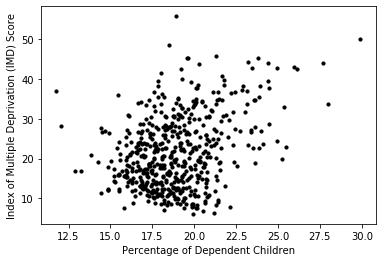

In [255]:
x_name='Percentage of Dependent Children'
y_name='Index of Multiple Deprivation (IMD) Score'
x_data=df_joined[x_name]
y_data=df_joined[y_name]
          
fig,ax=plt.subplots(1,1)
ax.scatter(x_data,y_data,s=10,c='black')
ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
plt.show();

### Multiple scatter plots <a name="multiple-scatter-plots"></a>

First we can split the dataframe into two dataframes, for those constituencies that voted labour and those that voted conservative:

In [256]:
df_lab=df_joined[df_joined['first_party']=='Lab']
df_con=df_joined[df_joined['first_party']=='Con']

Three scatter plots can then be made firstly for labour, then conservative, then for both on the same plot:

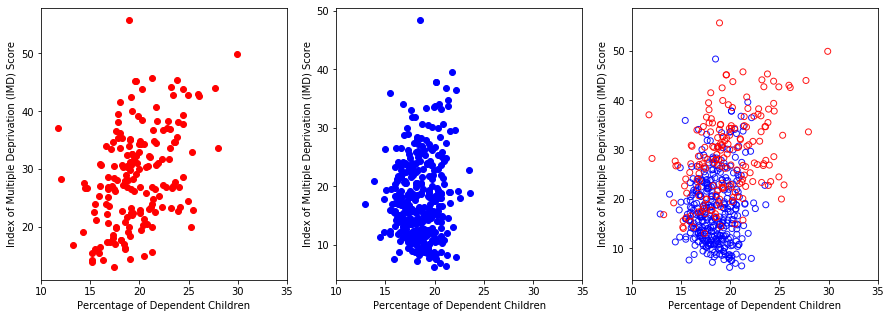

In [257]:
x_name='Percentage of Dependent Children'
y_name='Index of Multiple Deprivation (IMD) Score'


fig,ax=plt.subplots(1,3,figsize=(15,5))

x_data_lab=df_lab[x_name]
y_data_lab=df_lab[y_name]
ax[0].scatter(x_data_lab,y_data_lab,c='red')
ax[0].set_xlim(10,35)
ax[0].set_xlabel(x_name)
ax[0].set_ylabel(y_name)

x_data_con=df_con[x_name]
y_data_con=df_con[y_name]
ax[1].scatter(x_data_con,y_data_con,c='blue')
ax[1].set_xlim(10,35)
ax[1].set_xlabel(x_name)
ax[1].set_ylabel(y_name)

ax[2].scatter(x_data_con,y_data_con,facecolors='none',edgecolors='blue',alpha=0.9)
ax[2].scatter(x_data_lab,y_data_lab,facecolors='none',edgecolors='red',alpha=0.9)
ax[2].set_xlim(10,35)
ax[2].set_xlabel(x_name)
ax[2].set_ylabel(y_name)


plt.show();

### Scatter with 3D <a name="scatter-with-3d"></a>

Next up we can make a 3D scatter plot by making the colour of the markers represent a third variable (% of the population that is white) and add a colour-bar to the plot to show the values for this.

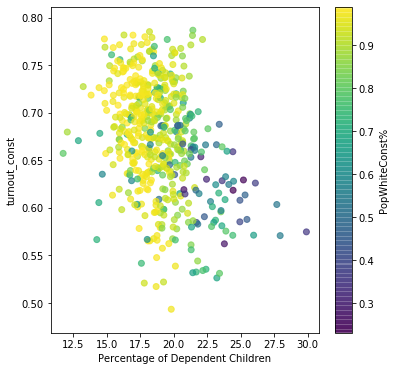

In [258]:
x_name='Percentage of Dependent Children'
y_name='turnout_const'
z_name='PopWhiteConst%'
x_data=df_joined[x_name]
y_data=df_joined[y_name]
z_data=df_joined[z_name]
          

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cbar_data=ax.scatter(x_data,y_data,c=z_data,alpha=0.7)
cbar=plt.colorbar(cbar_data)
cbar.set_label(z_name)
ax.set_ylabel(y_name)
ax.set_xlabel(x_name)
plt.show();

### Histograms <a name="histograms"></a>

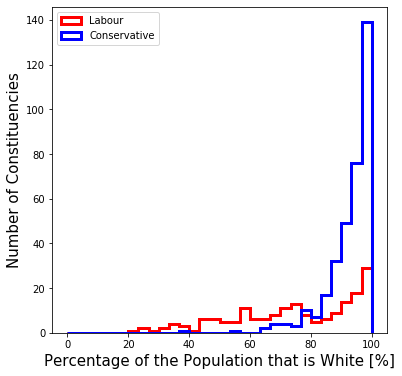

In [225]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
nbins=30
xmin=0
xmax=100
binWidth=(xmax-xmin)/nbins
bins=np.arange(xmin,xmax+binWidth,binWidth)
ax.hist(100.*df_lab['PopWhiteConst%'],bins=bins,edgecolor='red',linewidth=3,histtype='step',log=False,label='Labour')
ax.hist(100.*df_con['PopWhiteConst%'],bins=bins,edgecolor='blue',linewidth=3,histtype='step',log=False,label='Conservative')
ax.set_ylabel("Number of Constituencies",size=15)
ax.set_xlabel("Percentage of the Population that is White [%]",size=15)
plt.legend(loc='upper left')
plt.show();

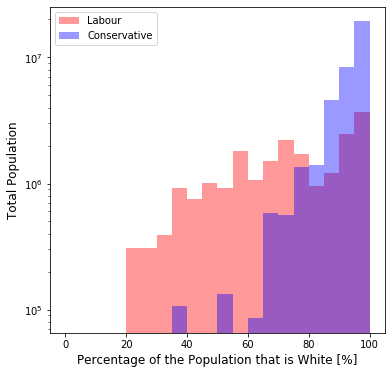

In [235]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
nbins=20
xmin=0
xmax=100
binWidth=(xmax-xmin)/nbins
bins=np.arange(xmin,xmax+binWidth,binWidth)

ax.hist(100.*df_lab['PopWhiteConst%'],
        weights=df_lab['Total population: mid 2015 (excluding prisoners)'],
        bins=bins,color='red',linewidth=3,alpha=0.4,log=True,label='Labour')
ax.hist(100.*df_con['PopWhiteConst%'],
        weights=df_con['Total population: mid 2015 (excluding prisoners)'],
        bins=bins,color='blue',linewidth=3,alpha=0.4,log=True,label='Conservative')

ax.set_ylabel("Total Population",size=12)
ax.set_xlabel("Percentage of the Population that is White [%]",size=12)
plt.legend(loc='upper left')
plt.show();